## Workflow

1) Estimate your statistical model. The point estimates for logit/probit are non-linear and non-additive. We cannot just directly interpret the coefficients, unless you prefer to interpret odds ratios (logit).

2) Goal: Simulate uncertainty. The ML approach to estimation fits parameters to a dataset. How do we capture uncertainty in our downstream predictions? There are a number of ways -- I'll follow Gelman and Hill (2007) and will do so through simulation. This can be accomplished in at least two ways: Bootstrapping (draw repeated samples from your data, calculate parameters each time, calculate uncertainty by how much parameters change); Simulating from the variance-covariance matrix of parameters. **$\textbf{b} \sim mvnorm(1000, coef(b), cov(b))$**. 

3) I'll use the second approach below. Save the model estimates, save the covariance estimates. Draw 1000 values from a multivariate normal density, save the results.

4) Determine what you want to predict and generate a "new dataset" of the same size as the original dataset. This allows.

5) Use basic matrix operations to generate a prediction for each simulated draw of your parameter simulations, based on the observed data. 

6) Transform if need be to probability space, and calculate summary statistics to construct confidence interval.

7) Construct a plot dataframe and use GGPLOT (or lattice, or something else).

$\bullet$ Fai's Data: Line plot.

$\bullet$ Sanho's Data: Bar plot.

$\bullet$ Rongbo's data. Non-linear and non-additivity in predictions in a line plot with CIs.

***Note: I'm only working from these data because these were shared in class. I've significantly changed the models, so even if these are (or are not) your data, I encourage you to have a look to see what I've done. The steps defined above were always used. If you are a student who is struggling with your data and would like me to have a look, and possibly work with you on this, please see me during office hours. I'm happy to incorporate your data into the notebook, but you will need to ask.***



## Fai's Data

**In this example, I'll plot x against p(y) with a 95% confidence interval generated by drawing repeated values from $\textbf{b} \sim mvnorm(1000, coef(b), cov(b))$**

mean,lower,upper,x
<dbl>,<dbl>,<dbl>,<dbl>
0.6614735,0.6373646,0.6854411,0.0
0.6067595,0.5855084,0.6274502,0.1
0.5498272,0.5322254,0.5678169,0.2
0.4918352,0.4761143,0.5067519,0.3
0.4340097,0.4198124,0.4480072,0.4
0.3775666,0.3645687,0.3919424,0.5
0.3236351,0.3091499,0.3393846,0.6
0.2731896,0.2574334,0.2904673,0.7
0.2269980,0.2098275,0.2449942,0.8


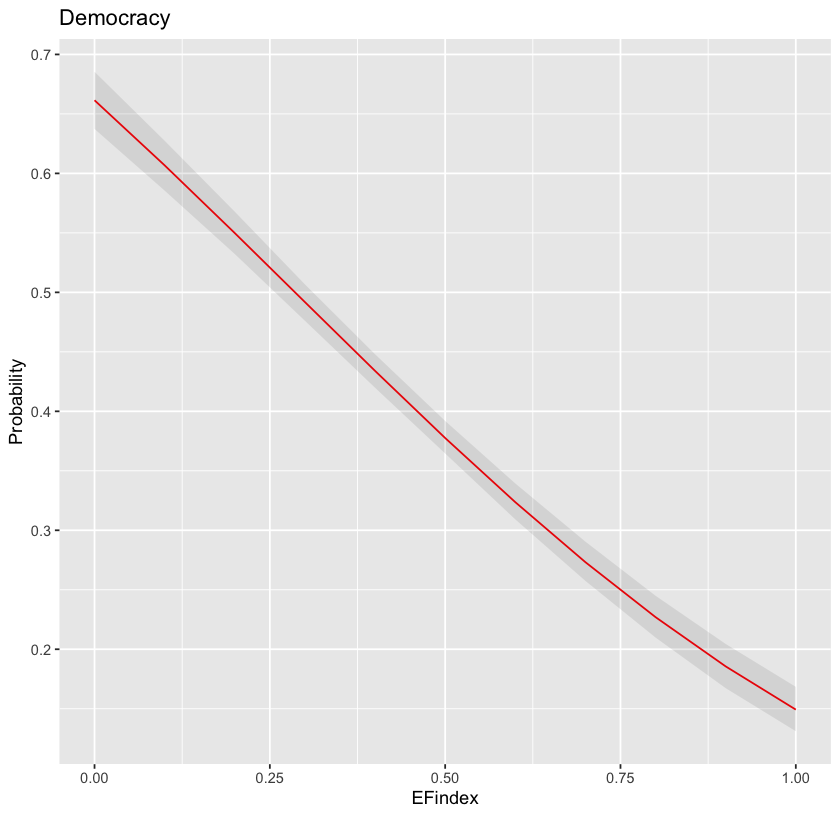

In [80]:
library(ggplot2)
library(dplyr)

dat=read.csv("~/desktop/fai_data.csv")
m1 <- glm(democracy~EFindex, dat, family=binomial("probit"))
pred<-MASS::mvrnorm(1000, coef(m1), vcov(m1))
nd=cbind(1, EFindex=seq(from=0,to=1,by=0.1))
#pred %*% t(nd) %>% pnorm() ## Tell me what this matrix represents
# Each column is a prediction given x, x - ranges from 0 to 1 by 0.01, 101 estimates
mean=pred %*% t(nd) %>% pnorm() %>% apply(2, mean)
## coefficient simulation, b, 1000 x 2
## nd, 11 x 2; b x nd(nonconformable); b x t(nd), 1000x2 * 2 x 11, 1000 x 11
lower=pred %*% t(nd) %>% pnorm() %>% apply(2, quantile, 0.025)
upper=pred %*% t(nd) %>% pnorm() %>% apply(2, quantile, 0.975)
plot.data<-data.frame(mean, lower, upper, x=seq(from=0,to=1,by=0.1))
plot.data
plt <- ggplot(plot.data, aes(x=x, y=mean, 
                             ymax=upper, ymin=lower))+
  geom_line(colour="red", alpha=1)+
  labs(title="Democracy",
       caption="")+
  xlab("EFindex")+
  ylab("Probability") + 
  geom_ribbon(alpha = 0.1)
plt


# Sanho's Example
**In this example, I'll plot discrete against p(y) with a 95% confidence interval generated by drawing repeated values from $\textbf{b} \sim mvnorm(1000, coef(b), cov(b))$**. Here, we'll generate a bar plot, with confidence intervals.

In [81]:
df=read.csv("~/desktop/sanho/data.csv")%>% as.data.frame(header=TRUE)

#develop the index of enthusiasm(normal, peace, radical)
df$index_norma <- rowMeans(subset(df, select = c(df$Sit_cheeringzone, df$Cheer_sing, df$Stand, df$shake_hands, df$scold_ref_oppo, df$vulgar_lang, df$throw_things, df$booing_PRC, df$wear_HK_shirt, df$Buy_souven)), na.rm = TRUE)
df$index_peace <- rowMeans(subset(df, select = c(df$Sit_cheeringzone, df$Cheer_sing, df$Stand, df$shake_hands,df$wear_HK_shirt, df$Buy_souven)), na.rm = TRUE)
df$index_radic <- rowMeans(subset(df, select = c(df$Sit_cheeringzone, df$Cheer_sing, df$Stand, df$shake_hands, df$scold_ref_oppo, df$vulgar_lang, df$throw_things, df$booing_PRC, df$wear_HK_shirt)), na.rm = TRUE)

# recode function in car package
# recode in the dplyr/tidyverse

#recode the date

df$poli_spectrum1<-ifelse(is.na(df$poli_spectrum), NA, 
                            ifelse(df$poli_spectrum == 1, 1,
                                   ifelse(df$poli_spectrum == 2, 1,
                                   ifelse(df$poli_spectrum == 3, 3,
                                   ifelse(df$poli_spectrum == 4, 3,
                                   ifelse(df$poli_spectrum == 5, 3,
                                   ifelse(df$poli_spectrum == 6, 3,                                         
                                   ifelse(df$poli_spectrum == 7, 3,                           
                                   ifelse(df$poli_spectrum == 8, 2,
                                          df$poli_spectrum)))))))))





df$poli_spectrum1=as.factor(df$poli_spectrum1)


df$poli_spectrum2 <- ifelse(is.na(df$poli_spectrum), NA, 
                            ifelse(df$poli_spectrum == 1, 1,
                                   ifelse(df$poli_spectrum == 2, 2,
                                   ifelse(df$poli_spectrum == 3, 4,
                                          ifelse(df$poli_spectrum == 4, 5,
                                                 ifelse(df$poli_spectrum == 5, 6,
                                                        ifelse(df$poli_spectrum == 6, 7,
                                                               ifelse(df$poli_spectrum == 7, 8,                                           
                                                                      ifelse(df$poli_spectrum == 8, 3,           
                                                                              df$poli_spectrum)))))))))



df$poli_spectrum3 <- ifelse(is.na(df$poli_spectrum), NA, 
                            ifelse(df$poli_spectrum == 1, 1,
                                   ifelse(df$poli_spectrum == 2, 1,
                                          ifelse(df$poli_spectrum == 3, 3,
                                                 ifelse(df$poli_spectrum == 4, 3,
                                                        ifelse(df$poli_spectrum == 5, 4,
                                                               ifelse(df$poli_spectrum == 6, 4,                                         
                                                                      ifelse(df$poli_spectrum == 7, 4,                           
                                                                             ifelse(df$poli_spectrum == 8, 2,
                                                                                    df$poli_spectrum)))))))))

df$poli_spectrum3=as.factor(df$poli_spectrum3)

df$identity1 <- ifelse(is.na(df$identity), NA, 
                      ifelse(df$identity == 1, 3,
                             ifelse(df$identity == 3, 1,
                                    df$identity)))
df$identity1=as.factor(df$identity1)


df$identity2 <- ifelse(is.na(df$identity), NA, 
                          ifelse(df$identity == 1, 3,
                                 ifelse(df$identity == 3, 1,
                                        ifelse(df$identity == 2, 3,
                                        df$identity))))

df$Edu_level1 <- ifelse(is.na(df$Edu_level), NA, 
                       ifelse(df$Edu_level == 0, NA,
                              df$Edu_level))


df$shared_glory_shame1 <- ifelse(is.na(df$shared_glory_shame), NA, 
                                  ifelse(df$shared_glory_shame == 1, -2,
                                         ifelse(df$shared_glory_shame == 2, -1,
                                                ifelse(df$shared_glory_shame == 3, 0,
                                                       ifelse(df$shared_glory_shame == 4, 1,
                                                              ifelse(df$shared_glory_shame == 5, 2,
                                                                     df$shared_glory_shame))))))

df$Hkteam_symbol1 <- ifelse(is.na(df$Hkteam_symbol), NA, 
                             ifelse(df$Hkteam_symbol == 1, -2,
                                    ifelse(df$Hkteam_symbol == 2, -1,
                                           ifelse(df$Hkteam_symbol == 3, 0,
                                                  ifelse(df$Hkteam_symbol == 4, 1,
                                                         ifelse(df$Hkteam_symbol == 5, 2,
                                                                df$Hkteam_symbol))))))

df$cheer_belong_sense1 <- ifelse(is.na(df$cheer_belong_sense), NA, 
                            ifelse(df$cheer_belong_sense == 1, -2,
                                   ifelse(df$cheer_belong_sense == 2, -1,
                                          ifelse(df$cheer_belong_sense == 3, 0,
                                                 ifelse(df$cheer_belong_sense == 4, 1,
                                                        ifelse(df$cheer_belong_sense == 5, 2,
                                                               df$cheer_belong_sense))))))

df$CN_lost_happy1 <- ifelse(is.na(df$CN_lost_happy), NA, 
                             ifelse(df$CN_lost_happy == 1, -2,
                                    ifelse(df$CN_lost_happy == 2, -1,
                                           ifelse(df$CN_lost_happy == 3, 0,
                                                  ifelse(df$CN_lost_happy == 4, 1,
                                                         ifelse(df$CN_lost_happy == 5, 2,
                                                                df$CN_lost_happy))))))

df$HKvsCN_hesitate1 <- ifelse(is.na(df$HKvsCN_hesitate), NA, 
                               ifelse(df$HKvsCN_hesitate == 1, -2,
                                      ifelse(df$HKvsCN_hesitate == 2, -1,
                                             ifelse(df$HKvsCN_hesitate == 3, 0,
                                                    ifelse(df$HKvsCN_hesitate == 4, 1,
                                                           ifelse(df$HKvsCN_hesitate == 5, 2,
                                                                  df$HKvsCN_hesitate))))))

df$strengthen_HK_iden1 <- ifelse(is.na(df$strengthen_HK_iden), NA, 
                                  ifelse(df$strengthen_HK_iden == 1, -2,
                                         ifelse(df$strengthen_HK_iden == 2, -1,
                                                ifelse(df$strengthen_HK_iden == 3, 0,
                                                       ifelse(df$strengthen_HK_iden == 4, 1,
                                                              ifelse(df$strengthen_HK_iden == 5, 2,
                                                                     df$strengthen_HK_iden))))))

df$Sex1 <- ifelse(is.na(df$Sex), NA, 
                 ifelse(df$Sex == 2, 0,
                        df$Sex))



1,1,0
1,1,1


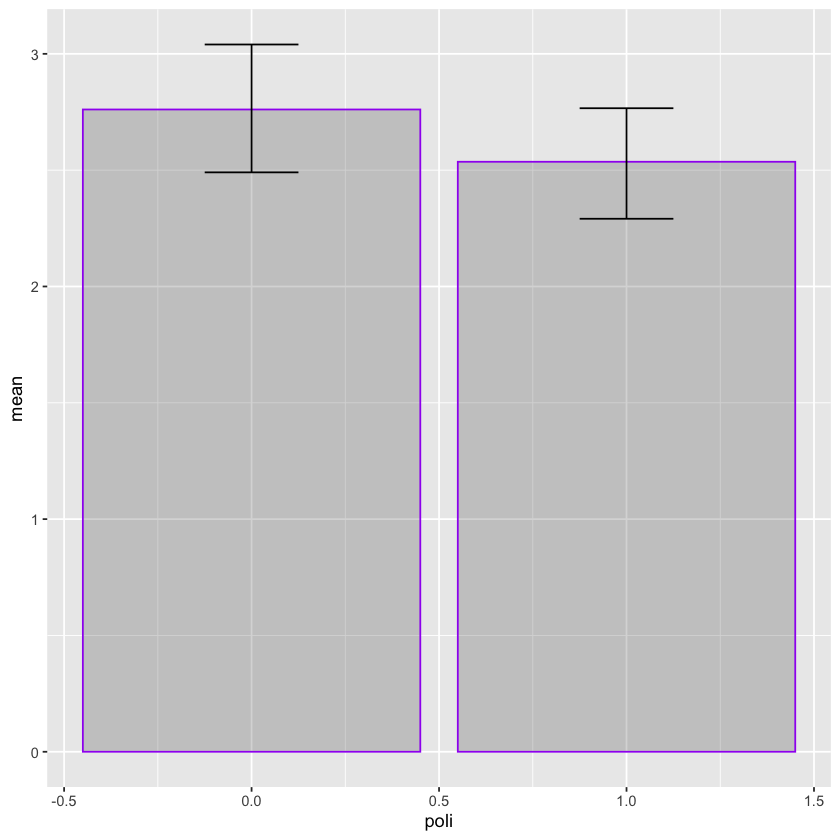

In [82]:
#run the regression
df$identity<-car::recode(df$identity1, "1:2=1; 3=0")
df$poli<-car::recode(df$poli_spectrum3, "1:2=1; 3:4=0")
m1 <- lm(index_norma ~ identity + poli, data=df)
pred<-MASS::mvrnorm(1000, coef(m1), vcov(m1))
nd=cbind(1, c(1,1), c(0,1))
#nd=cbind(1, c(1,1), c(0,1))
nd
mean=pred %*% t(nd) %>% apply(2, mean)
upper=pred %*% t(nd) %>% apply(2, quantile, 0.975)
lower=pred %*% t(nd) %>% apply(2, quantile, 0.025)
plot.data<-data.frame(mean, upper, lower, nd[,2:3])
names(plot.data)<-c("mean", "upper", "lower", "identity", "poli" )

ggplot(plot.data, aes(x=poli, y=mean, ymin=lower, ymax=upper, group=1))+
geom_bar(stat="identity", col="purple", alpha=0.25) +
geom_errorbar(position = "dodge", width = 0.25) 




## Rongbo's Example

**In this example, I'll plot discrete against p(y) with a 95% confidence interval generated by drawing repeated values from $\textbf{b} \sim mvnorm(1000, coef(b), cov(b))$**. Here, we'll generate a bar plot, with confidence intervals. Let's see why the model is non-linear and non-additive. Notice that ideology has a different effect when one is a conservative or liberal.

[1] "id"             "year"           "age"            "gender"        
 [5] "race"           "ideology"       "party_id"       "dem_like"      
 [9] "dem_dislike"    "gop_like"       "gop_dislike"    "dem_like_bi"   
[13] "dem_dislike_bi" "gop_like_bi"    "gop_dislike_bi" "ft_dem"        
[17] "ft_gop"         "auth_ind"       "auth_cur"       "auth_obed"     
[21] "auth_consid"    "auth"           "party_id_cat"   "ft_dif"        
[25] "ft_dif_cat"

mean,low,high,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2869119,0.2667990,0.3081574,2,1
0.3684968,0.3513229,0.3866575,2,2
0.4584203,0.4427785,0.4745775,2,3
0.5511437,0.5333592,0.5694534,2,4
0.6404063,0.6185159,0.6620016,2,5
0.7208418,0.6951766,0.7456224,2,6
0.7891360,0.7620098,0.8152236,2,7
0.1908746,0.1647585,0.2203525,6,1
0.2547401,0.2276873,0.2836855,6,2


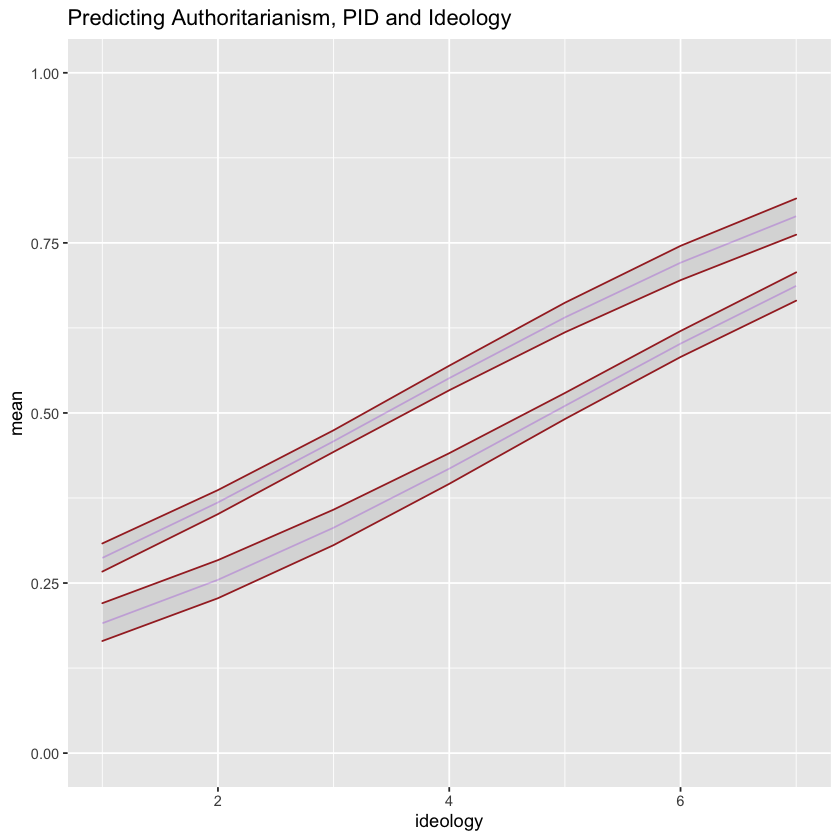

In [83]:
library(dplyr)
load("~/desktop/rongbo/anes.Rdata")
names(anes)
### The model is both nonlinear and nonadditive
### What you set your "control" covariates at matters
anes$autho<-ifelse(anes$auth>0.5, 1, 0)
m1<-glm(autho ~ party_id +ideology, 
            data=anes, family=binomial("logit"))
## Effect among Democrats
nd<-cbind(1, 1, seq(1,7,1))
sim_beta=MASS::mvrnorm(1000, coef(m1), vcov(m1))

nd<-cbind(1, 1, seq(1,7,1))

mean=nd %*% t(sim_beta) %>% plogis() %>% apply(1, mean) %>% as.numeric()
low=nd %*% t(sim_beta) %>% plogis() %>% apply(1, quantile, 0.025) %>% as.numeric()
high=nd %*% t(sim_beta) %>% plogis() %>% apply(1, quantile, 0.975) %>% as.numeric()
dat1<-cbind(mean, low, high, 2 , seq(1,7,1))

nd<-cbind(1, 7, seq(1,7,1))

mean=nd %*% t(sim_beta) %>% plogis() %>% apply(1, mean) %>% as.numeric()
low=nd %*% t(sim_beta) %>% plogis() %>% apply(1, quantile, 0.025) %>% as.numeric()
high=nd %*% t(sim_beta) %>% plogis() %>% apply(1, quantile, 0.975) %>% as.numeric()
dat2<-cbind(mean, low, high, 6, seq(1,7,1))

plot.data<-data.frame(rbind(dat1, dat2))
plot.data

names(plot.data)<-c("mean", "low", "high", "PID", "ideology")

ggplot(plot.data, aes(x=ideology, y=mean, 
                      ymin=low, ymax=high, group=PID))+
    geom_line(col="purple", alpha=0.25)+
    geom_ribbon(col='brown', alpha=0.10)+
    ylim(limit=c(0,1))+
    ggtitle("Predicting Authoritarianism, PID and Ideology")



Now let's see the effect of party id when ideology is fixed at liberal and conservative

mean,low,high,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2869119,0.2667990,0.3081574,1,2
0.2690062,0.2492384,0.2900417,2,2
0.2518392,0.2307173,0.2740813,3,2
0.2354328,0.2134354,0.2594631,4,2
0.2198005,0.1967680,0.2459656,5,2
0.2049481,0.1806039,0.2328129,6,2
0.1908746,0.1647585,0.2203525,7,2
0.7891360,0.7620098,0.8152236,1,6
0.7739763,0.7487344,0.7975582,2,6


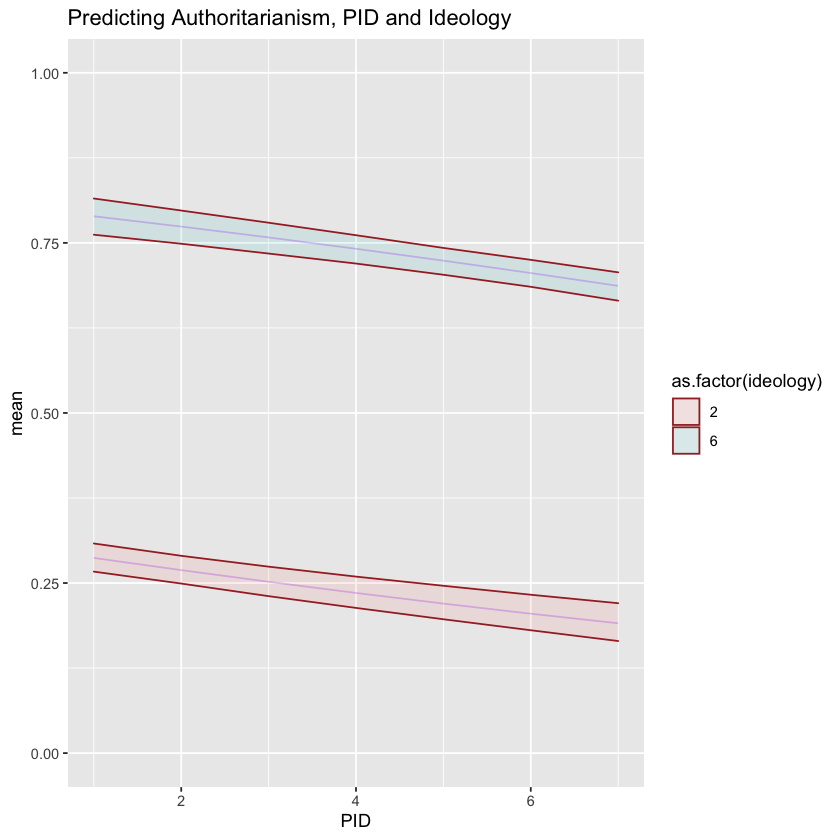

In [84]:
nd<-cbind(1,seq(1,7,1), 1)

mean=nd %*% t(sim_beta) %>% plogis() %>% apply(1, mean) %>% as.numeric()
low=nd %*% t(sim_beta) %>% plogis() %>% apply(1, quantile, 0.025) %>% as.numeric()
high=nd %*% t(sim_beta) %>% plogis() %>% apply(1, quantile, 0.975) %>% as.numeric()
dat1<-cbind(mean, low, high, seq(1,7,1),2)

nd<-cbind(1, seq(1,7,1), 7)

mean=nd %*% t(sim_beta) %>% plogis() %>% apply(1, mean) %>% as.numeric()
low=nd %*% t(sim_beta) %>% plogis() %>% apply(1, quantile, 0.025) %>% as.numeric()
high=nd %*% t(sim_beta) %>% plogis() %>% apply(1, quantile, 0.975) %>% as.numeric()
dat2<-cbind(mean, low, high, seq(1,7,1), 6)

plot.data<-data.frame(rbind(dat1, dat2))
plot.data

names(plot.data)<-c("mean", "low", "high", "PID", "ideology")

ggplot(plot.data, aes(x=PID, y=mean, 
                      ymin=low, ymax=high, group=ideology, fill=as.factor(ideology)))+
    geom_line(col="purple", alpha=0.25)+
    geom_ribbon(col='brown', alpha=0.10)+
    ylim(limit=c(0,1))+
    ggtitle("Predicting Authoritarianism, PID and Ideology")  ###Even the most liberal conservative is still authoritarian

### YOU COULD THEN ADJUST AESTHETICS TO CHANGE COLORS, LABELS, AND SO ON